In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
import joblib
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
df_train = pd.read_csv("/content/twitter_training.csv")
df_test = pd.read_csv("/content/twitter_validation.csv")

In [12]:
df = pd.concat([df_train,df_test],ignore_index=True)

In [13]:
df.shape

(75680, 8)

In [14]:
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,",3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,2401.0,Borderlands,Positive,I am coming to the borders and I will kill you...,NaN,NaN,NaN,NaN
1,2401.0,Borderlands,Positive,im getting on borderlands and i will kill you ...,NaN,NaN,NaN,NaN
2,2401.0,Borderlands,Positive,im coming on borderlands and i will murder you...,NaN,NaN,NaN,NaN
3,2401.0,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,NaN,NaN,NaN,NaN
4,2401.0,Borderlands,Positive,im getting into borderlands and i can murder y...,NaN,NaN,NaN,NaN


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75680 entries, 0 to 75679
Data columns (total 8 columns):
 #   Column                                                                                                                                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                                              --------------  -----  
 0   2401                                                                                                                                                                                                                                                74681 non-null  float64
 1   Borderlands                                                         

In [16]:
df.columns

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,', '3364',
       'Facebook', 'Irrelevant',
       'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣'],
      dtype='object')

In [23]:
df.Positive

0        Positive
1        Positive
2        Positive
3        Positive
4        Positive
           ...   
75675         NaN
75676         NaN
75677         NaN
75678         NaN
75679         NaN
Name: Positive, Length: 75680, dtype: object

In [24]:
columns_to_drop = ['2401', '3364', 'Facebook', 'Irrelevant',
                   'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣']
df = df.drop(columns_to_drop, axis=1)

In [26]:
df.head()

,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,Borderlands,Positive,I am coming to the borders and I will kill you...
1,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,Borderlands,Positive,im coming on borderlands and i will murder you...
3,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,Borderlands,Positive,im getting into borderlands and i can murder y...


In [29]:
df.Borderlands.unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia', nan], dtype=object)

In [30]:
df = df.rename(columns={"Borderlands":"Branch","Positive":"Sentiment",
                        "im getting on borderlands and i will murder you all ,": 'Tweet'})

In [31]:
df.head(2)

,Branch,Sentiment,Tweet
0,Borderlands,Positive,I am coming to the borders and I will kill you...
1,Borderlands,Positive,im getting on borderlands and i will kill you ...


In [32]:
df.isna().sum()

Branch        999
Sentiment     999
Tweet        1685
dtype: int64

In [35]:
df.dropna(inplace=True)


AttributeError: 'DataFrame' object has no attribute 'isull'

In [42]:
print(f"No of null value  \n{df.isnull().sum()}" )

No of null value  
Branch       0
Sentiment    0
Tweet        0
dtype: int64


In [43]:
df.duplicated().sum()

3038

In [44]:
df_duplicate = df.drop_duplicates()

In [45]:
df = df_duplicate
df.duplicated().sum()

0

<Axes: xlabel='Sentiment', ylabel='Branch'>

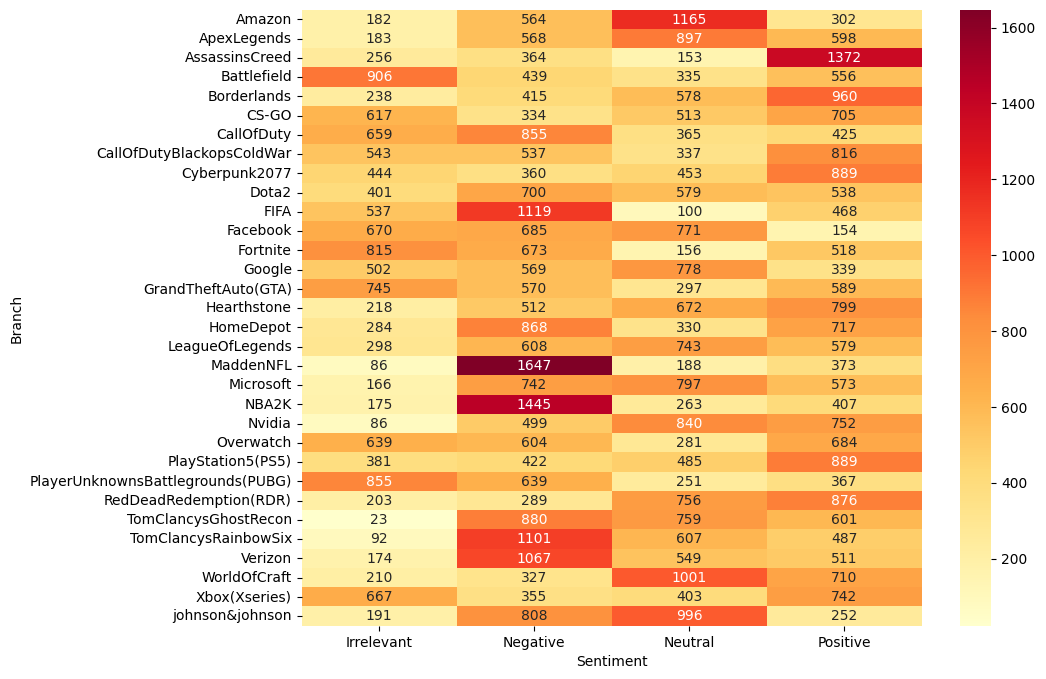

In [51]:
plt.figure(figsize = (10,8))
table = pd.crosstab( index = df["Branch"], columns = df['Sentiment'])
sns.heatmap(table,cmap='YlOrRd', annot=True,fmt = 'd')

In [52]:
def normalize_text(text):
  return text.lower()

In [53]:
def remove_tage(text):
  return re.sub(r'<.*?>','',text)

In [54]:
def remove_urls(text):
  return re.sub(r'https\S+|www\S+','',text)

In [55]:
def remove_digit(text):
  return re.sub(r'\d+','',text)

In [56]:
def remove_punctuation(text):
  return text.translate(str.maketrans('','',string.punctuation))

In [57]:
def text_tokenization(text):
  return word_tokenize(text)

In [58]:
def remove_stopwords(token):
  stop_words = set(stopwords.words('english'))
  return [word for word in token if word not in stop_words]

In [59]:
def remove_emojis(text):
    """Remove emojis from the text."""
    if isinstance(text, str):
        emoji_pattern = re.compile("["
                                   u"\U0001F600-\U0001F64F"  # emoticons
                                   u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                   u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                   u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                   u"\U00002500-\U00002BEF"  # chinese char
                                   u"\U00002702-\U000027B0"
                                   u"\U00002702-\U000027B0"
                                   u"\U000024C2-\U0001F251"
                                   u"\U0001f926-\U0001f937"
                                   u"\U00010000-\U0010ffff"
                                   u"\u2640-\u2642"
                                   u"\u2600-\u2B55"
                                   u"\u200d"
                                   u"\u23cf"
                                   u"\u23e9"
                                   u"\u231a"
                                   u"\ufe0f"  # dingbats
                                   u"\u3030"
                                   "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', text)
    else:
        return text

In [72]:
def preprocess_text(df):
  df = filter_non_String(df,'Tweet')
  df['Tweet'] = df['Tweet'].apply(normalize_text)
  df['Tweet'] = df['Tweet'].apply(remove_tage)
  df['Tweet'] = df['Tweet'].apply(remove_urls)
  df['Tweet'] = df['Tweet'].apply(remove_digit)
  df['Tweet'] = df['Tweet'].apply(remove_punctuation)
  df['Tweet'] = df['Tweet'].apply(text_tokenization)
  df['Tweet'] = df['Tweet'].apply(remove_stopwords)
  df['Tweet'] = df['Tweet'].apply(remove_emojis)

  return df
df_preprocess = preprocess_text(df)

In [61]:
def vectorization_data(text_data):
  pre_vec_data = [" ".join(tokens) for tokens in text_data]
  tfidf = TfidfVectorizer()
  tfidf_data = tfidf.fit_transform(pre_vec_data)
  return tfidf_data

In [66]:
def filter_non_String(df,column):
  df = df.dropna(subset = [column])
  df[column] = df[column].astype(str)
  return df



In [75]:
df_preprocess.head()

,Branch,Sentiment,Tweet
0,Borderlands,Positive,"[coming, borders, kill]"
1,Borderlands,Positive,"[im, getting, borderlands, kill]"
2,Borderlands,Positive,"[im, coming, borderlands, murder]"
3,Borderlands,Positive,"[im, getting, borderlands, murder]"
4,Borderlands,Positive,"[im, getting, borderlands, murder]"


In [77]:
df_preprocess['Tweet'] = df_preprocess['Tweet'].apply(lambda x: ' '.join(x))

In [78]:
X = df_preprocess['Tweet']
y = df_preprocess['Sentiment']

In [80]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [84]:
print(X_train.shape),
print(X_test.shape),
print(y_train.shape),
print(y_test.shape)

(56765,)
(14192,)
(56765,)
(14192,)


In [85]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [86]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [87]:
y_pred = rf_classifier.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.9062852311161218


...............................